In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = lambda t, x: -x
a = 0
b = 3
N = 500
t = np.linspace(a, b, N)
x_exact = np.vectorize(lambda t: np.exp(-t))(t)

In [3]:
u = np.zeros_like(t)
u[0] = 1

In [4]:
def Euler(t,u,f):
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        u[i+1] = u[i] + h*(f(t[i], u[i]))
    return u

In [12]:
def RungeKutt_2(t,u,f, alpha=0.75):
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        u[i+1] = u[i] + h*((1-alpha)*f(t[i], u[i])+ alpha*f(t[i] + h/(2*alpha), u[i] + h/(2*alpha)*f(t[i], u[i])))
    return u

In [17]:
def RungeKutt_4(t,u,f, alpha=0.75):
    for i in range(len(t)-1):
        h = t[i+1] - t[i]
        k1 = f(t[i], u[i])
        k2 = f(t[i] + h/2, u[i] + k1*h/2)
        k3 = f(t[i] + h/2, u[i] + k2*h/2)
        k4 = f(t[i] + h, u[i] + k3*h)
        u[i+1] = u[i] + h/6*(k1+2*k2+2*k3+k4)
    return u

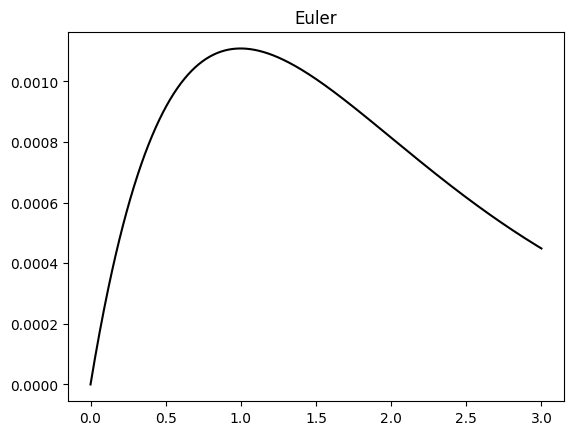

In [18]:
plt.plot(t, np.abs(Euler(t,u,f) - x_exact),'k')
plt.title('Euler')
plt.show()

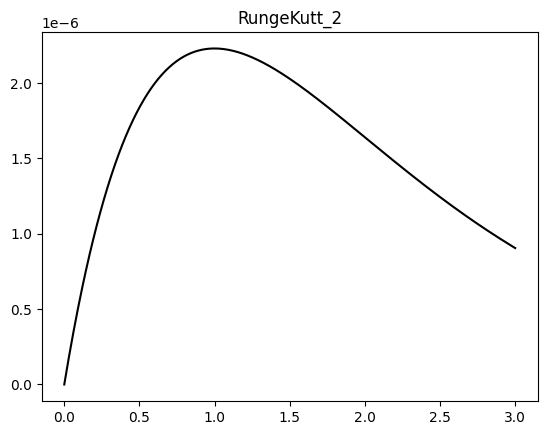

In [19]:
u = np.zeros_like(t)
u[0] = 1
plt.plot(t, np.abs(RungeKutt_2(t,u,f) - x_exact),'k')
plt.title('RungeKutt_2')
plt.show()

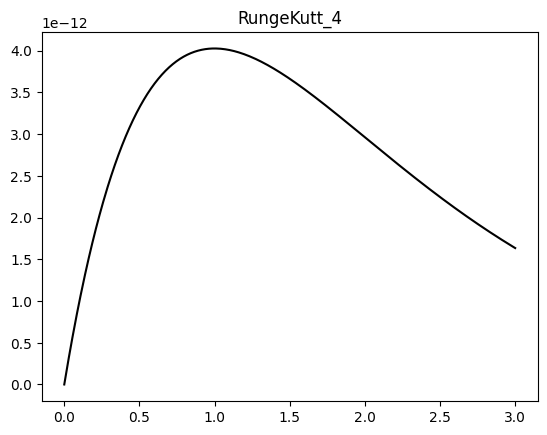

In [20]:
u = np.zeros_like(t)
u[0] = 1
plt.plot(t, np.abs(RungeKutt_4(t,u,f) - x_exact),'k')
plt.title('RungeKutt_4')
plt.show()


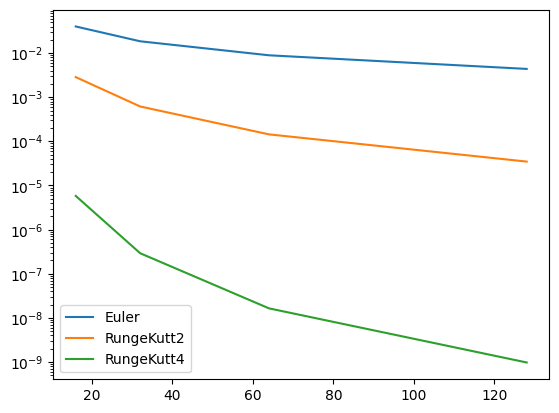

In [38]:
step, err_euler, err_rk2, err_rk4 = [], [], [], []
for n in range(4, 8):
    n=2**n
    t = np.linspace(a, b, n)
    x_exact = np.vectorize(lambda t: np.exp(-t))(t)
    u = np.zeros_like(t)
    u[0] = 1
    err_euler.append(np.abs(Euler(t,u,f) - x_exact).max())
    err_rk2.append(np.abs(RungeKutt_2(t,u,f) - x_exact).max())
    err_rk4.append(np.abs(RungeKutt_4(t,u,f) - x_exact).max())
    step.append(n)
#     plt.subplot(1,2,1)

plt.plot(step, err_euler, label='Euler')
plt.plot(step, err_rk2, label='RungeKutt2')
plt.plot(step, err_rk4, label='RungeKutt4')
# plt.xscale('log')
plt.yscale('log')
plt.legend()
#     plt.subplot(1,2,2)
plt.show()